In [1]:
## PART A
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [2]:
## PART B
train_image_file = "/Users/javi/projects/school/2022-jag043/DSE210/train-images-idx3-ubyte" 
train_label_file = "/Users/javi/projects/school/2022-jag043/DSE210/train-labels-idx1-ubyte" 

x, y = loadmnist(train_image_file, train_label_file)

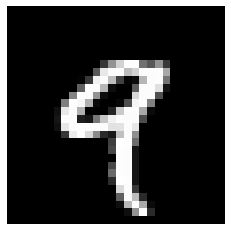

In [3]:
displaychar(x[4])

In [4]:
test_image_file = "/Users/javi/projects/school/2022-jag043/DSE210/t10k-images-idx3-ubyte" 
test_label_file = "/Users/javi/projects/school/2022-jag043/DSE210/t10k-labels-idx1-ubyte" 

test_image, test_label = loadmnist(train_image_file, train_label_file)

In [5]:
# was considering importing train_test_split, but it looks like the data is already randomized 
validation_image, validation_label = x[:10000], y[:10000]

In [6]:
train_image, train_label = x[10000:], y[10000:]

In [7]:
## PART C
num = 10

In [8]:
# what are pi[0,9]
pi = [] 

for i in range(0, num):
    pi.append(np.log(np.where(train_label == i)[0].size / 50000))

# verify that these probabilities add up to 1
np.exp(pi).sum()

0.9999999999999999

In [9]:
# split data set into values based on numbers 
p = []

for i in range (0, num):
    p.append(train_image[np.where(train_label == i)[0]])

In [10]:
# verify sum of each split equal to dataset size
sum_var = 0
for i in range (0, num):
    sum_var += len(p[i])
sum_var

50000

In [11]:
mean = []
cov = []
for i in range (0, num):
    mean.append(np.mean(p[i], axis=0))
    cov.append(np.cov(p[i], rowvar=False) + 3063 * np.identity(784))

# verify the size of the mean vector, covariance matrix
[len(mean_num) for mean_num in mean], [cov_num.shape for cov_num in cov]

([784, 784, 784, 784, 784, 784, 784, 784, 784, 784],
 [(784, 784),
  (784, 784),
  (784, 784),
  (784, 784),
  (784, 784),
  (784, 784),
  (784, 784),
  (784, 784),
  (784, 784),
  (784, 784)])

In [12]:
## PART D
# noticed that a C between 1000 and 10000 was the best

np.mean(np.diagonal(validation_image))*100

3063.775510204082

In [13]:
from scipy.stats import multivariate_normal

In [14]:
# train gaussians
gaus = []
for i in range (0, num):
    gaus.append(multivariate_normal(mean=mean[i], cov=cov[i]))

In [15]:
def get_number_guess(image):
    models = []
    for i in range (0, num):
        models.append(gaus[i].logpdf(image) + pi[i] )
        
    return models.index(max(models))

In [16]:
model_guess= []

for i in range (0, len(test_image)):
    model_guess.append(get_number_guess(test_image[i]))

model_guess = np.array(model_guess)

In [17]:
test_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
model_guess[28770]

6

In [18]:
## PART E

# error rate against test dataset
1 - (test_label == model_guess).sum() / len(test_label)

0.040549999999999975

In [19]:
random_nums = np.random.choice([i for i, value in enumerate(test_label == model_guess) if value == False], size=5, replace=False)
random_nums

array([11949,  5163, 18652, 57732, 44959])

In [20]:
def get_post_prob(image):
    models = []
    for i in range(num):
        log_prob = gaus[i].logpdf(image) + pi[i]
        models.append((log_prob))
        
    total_prob = sum(models)
    probs = [p/total_prob for p in models]
    return probs

probs = [get_post_prob(test_image[i]) for i in random_nums]

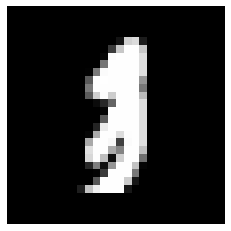

[0.10066550718888476, 0.0987053290707183, 0.09994420789451239, 0.09967459542387276, 0.10013503602078766, 0.10041385873294988, 0.10054789531721091, 0.10044016385065738, 0.09922136218202238, 0.10025204431838358]


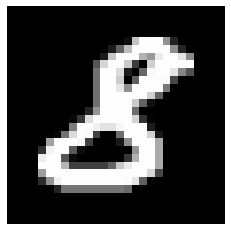

[0.09882491717425367, 0.10295960658088378, 0.09777380682493927, 0.09706905654603787, 0.1012963330880833, 0.09728777182558332, 0.10000559952367152, 0.10513427262740539, 0.0971938534270978, 0.10245478238204395]


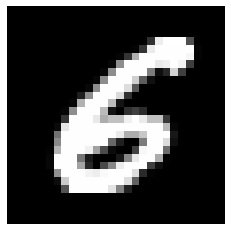

[0.09842423041849595, 0.10545909243596426, 0.09894535131121099, 0.09857607189609963, 0.09979226278551663, 0.09715539276642193, 0.09769002779199375, 0.10402969393241944, 0.09811909378596388, 0.1018087828759135]


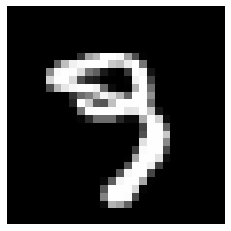

[0.10038823113830621, 0.10488076315589184, 0.10005728262869137, 0.09818965815596108, 0.09963697861979262, 0.09900222190251554, 0.10260835961812949, 0.09828523897539619, 0.09867890870457292, 0.09827235710074271]


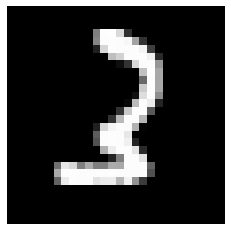

[0.100011611745233, 0.09946805248183438, 0.09785870799298178, 0.09802592723369176, 0.10157163551453298, 0.10049648652397608, 0.09999600831406148, 0.10240639067217762, 0.09892258537394148, 0.10124259414756945]


In [21]:
for index in random_nums:
    displaychar(test_image[index])
    print(get_post_prob(test_image[index]))

In [22]:
probs = [get_post_prob(test_image[28770])]

In [27]:
probs

[[0.1001297526487148,
  0.10168203516580111,
  0.10016680417523055,
  0.09937001109036954,
  0.10022197973104914,
  0.09878184838369873,
  0.0980966807593864,
  0.10162456316913288,
  0.09975362981409021,
  0.10017269506252652]]

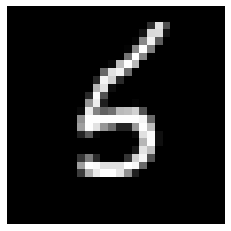

In [29]:
displaychar(test_image[28770])

In [30]:
test_label[28770]

5